In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze the Hamiltonian equation provided and break down the problem step by step following the given structure.

### QUESTION 1: Dimension and Basis Order

First, I need to identify the flavors in the system based on the Hamiltonian. From the equation, I can see:
- Two types of atoms or orbitals: 'a' (which seems to be N atoms) and 'b' (which seems to be B atoms)
- Spin index σ which can take two values (↑, ↓)

Let me count the total number of flavors:
- Atom types: 2 (N and B)
- Spin: 2 (↑ and ↓)

So, the tuple of flavors D should be (2, 2) where the first dimension represents atom types (N, B) and the second dimension represents spin (↑, ↓).

Basis Order:
0: Atom type. Order: N, B
1: Spin. Order: ↑, ↓

### QUESTION 2: Identifying Interacting Terms

Let's identify the EXP-VAL DEPENDENT TERMS:

1. `\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle` - This is the expectation value of B atom density with spin σ
2. `\langle a

In [7]:
print(generated_code['thinking'])

Let's analyze the Hamiltonian equation provided and break down the problem step by step following the given structure.

### QUESTION 1: Dimension and Basis Order

First, I need to identify the flavors in the system based on the Hamiltonian. From the equation, I can see:
- Two types of atoms or orbitals: 'a' (which seems to be N atoms) and 'b' (which seems to be B atoms)
- Spin index σ which can take two values (↑, ↓)

Let me count the total number of flavors:
- Atom types: 2 (N and B)
- Spin: 2 (↑ and ↓)

So, the tuple of flavors D should be (2, 2) where the first dimension represents atom types (N, B) and the second dimension represents spin (↑, ↓).

Basis Order:
0: Atom type. Order: N, B
1: Spin. Order: ↑, ↓

### QUESTION 2: Identifying Interacting Terms

Let's identify the EXP-VAL DEPENDENT TERMS:

1. `\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle` - This is the expectation value of B atom density with spin σ
2. `\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle` - This 

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2, 2)
Basis Order:
0: atom_type. Order: N, B
1: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
   "\\langle a^{\\dagger}_{k, \\sigma} a_{k, \\sigma} \\rangle": "Mean of exp_val[0, σ, 0, σ, :]",
   "\\langle b^{\\dagger}_{k, \\sigma} b_{k, \\sigma} \\rangle": "Mean of exp_val[1, σ, 1, σ, :]"
}

TERMS:
- t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n} -> H[0, σ, 0, σ, k], NI
- t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n} -> H[1, σ, 1, σ, k], NI
- t_{\rm BN} \sum_{k, \sigma} (a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'} + b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'}) -> H[0, σ, 1, σ, k] and H[1, σ, 0, σ, k], NI
- \Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} -> H[0, σ, 0, σ, k], NI
- \frac{U_{\rm B}}{N} \sum_{k, \sigma \neq \sigma'} \langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle b^{\dagger}_{k, \sigma'} b_{k, \si

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a two-orbital model (N and B atoms) with spin.
    
    The Hamiltonian includes:
    - Hopping terms for N atoms, B atoms, and between N and B atoms
    - On-site energy for N atoms
    - Various interaction terms (U_N, U_B, V_B, V_BN)
    
    Args:
        N_shell (int): Number of shells in the k-space grid.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'  # Square-centered lattice
        self.D = (2, 2)  # (atom_type, spin)
        self.basis_order = {'0': 'atom_type', '1': 'spin'}
        # atom_type: 0 = N (atoms at vertices), 1 = B (atoms at center)
        # spin: 0 = up, 1 = down
        
        # Occupancy relevant parameters
     

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_8.py


# Code evaluation

In [4]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [5]:
import importlib

In [6]:
module = importlib.import_module(code_path)

In [7]:
import HF

## Task 1: Check k-space

In [8]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

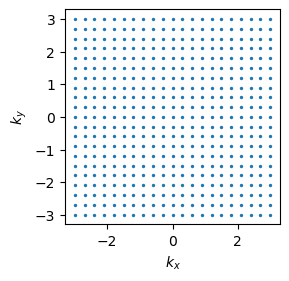

In [9]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [10]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [11]:
h_nonint = ham.generate_non_interacting()

In [12]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

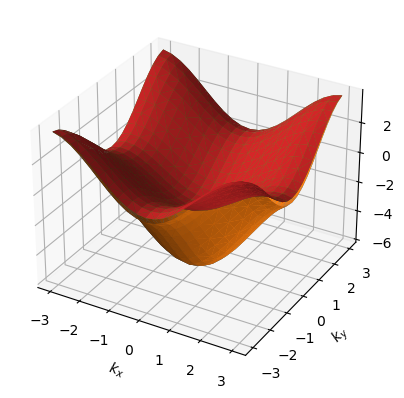

In [13]:
utils_auto.plot_2d_bandstructure(ham,en)

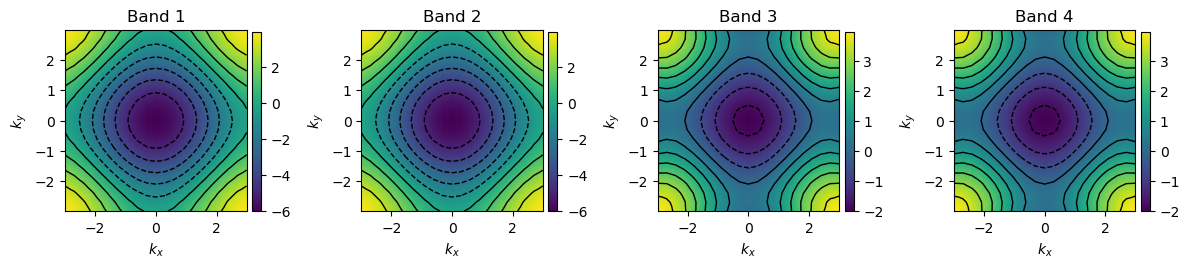

In [14]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [15]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [16]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [17]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


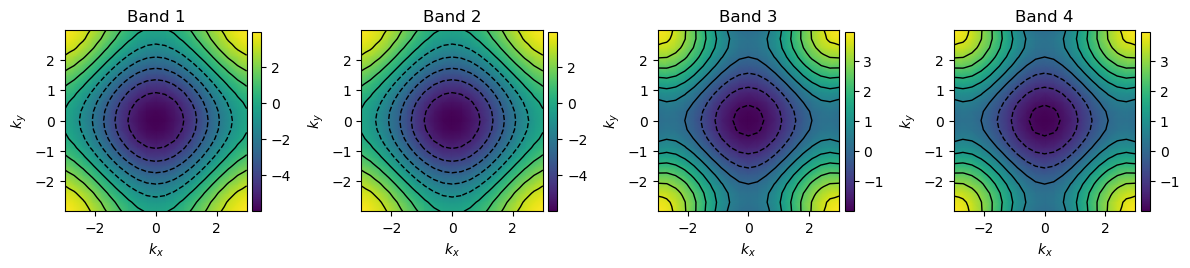

In [18]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [19]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [20]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [21]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


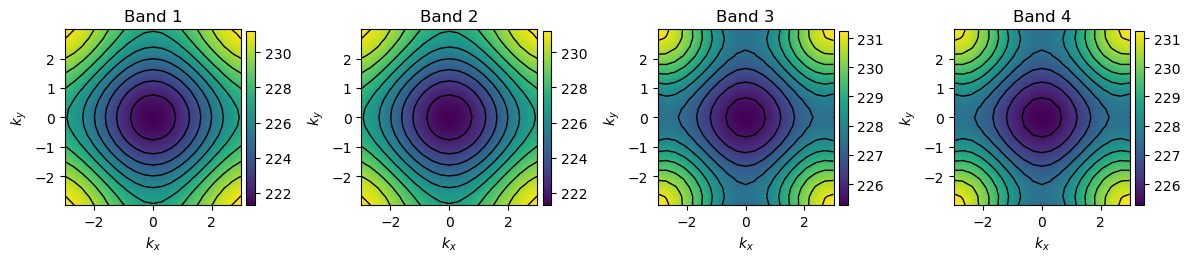

In [22]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [23]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -5.94
U/T is 93.18
mean_U is 56.75


# Auto eval

## Task 1

In [24]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the problem and determine if the image is correct according to the rubric.

First, I need to understand what's shown in the image and what the physical system is.

The image shows a uniform grid of points in $k$-space, with $k_x$ on the horizontal axis ranging from approximately -3 to 3, and $k_y$ on the vertical axis also ranging from about -3 to 3. The points form a square grid pattern.

Now, let's understand the physical system from the Hamiltonian:
- We have a system with two types of atoms/sites, labeled as N and B
- N atoms are at the vertices of a square lattice
- B atoms are at the center of the square lattice (making this a square-centered lattice)
- The

 Hamiltonian includes hopping terms ($t_N$, $t_B$, $t_{BN}$) and interaction terms ($U_N$, $U_B$, $V_B$, $V_{BN}$)
- The operators $a^{\dagger}_{k\sigma}, a_{k\sigma}$ likely refer to creation/annihilation operators for N atoms
- The operators $b^{\dagger}_{k\sigma}, b_{k\sigma}$ likely refer to creation/annihilation operators for B atoms

Let's check the rubric criteria:

1. The image should show momentum space mesh in the first Brillouin zone of the concerned problem.

For a square-centered lattice (which is effectively a square lattice with a basis consisting of two atoms: N at (0,0) and B at (1/2, 1/2)), the first Brillouin zone should be a square in k-space.

In a standard square lattice with lattice constant $a$, the first Brillouin zone would typically extend from $-\pi/a$ to $\pi/a$ in both $k_x$ and $k_y$ directions.

The image shows a square grid of points that extends from approximately -3 to 3 in both directions. This is larger than the expected first Brillouin zone for a s

In [25]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [26]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze
Let me analyze the band structure plot provided in the image and evaluate it based on the given rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice.

Looking at the plots, the Brillouin zone appears to be square-shaped, with the boundary represented by the plot extending from approximately -2.5 to 2.5 in both the kx and ky directions. This is consistent with what we'd expect for a square-centered lattice, where the first Brillouin zone is indeed a square in reciprocal space.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In all four band plots, the highest energy regions (shown in yellow) appear at the corners of the Brillouin zone.

2.2 Trace the pattern of energy variation across the zone:
In all four bands, the energy appears to be lowest (

In [27]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [28]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze these
Let me analyze these band structure plots following the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice.

From the image, I can see four panels labeled "Band 1" through "Band 4". Each panel shows a 2D plot in k-space with x-axis labeled as k_x and y-axis labeled as k_y. The plots range from approximately -2.5 to 2.5 on both axes.

For a square-centered lattice, the first Brillouin zone should be a square. From the plots, I can see that the region displayed is square-shaped, with boundaries at approximately ±2.5 in both k_x and k_y directions. This is consistent with what we'd expect for a square-centered lattice.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
Looking at all four bands, the highest energy regions (yellow) appear at the

In [29]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [30]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the
Let me analyze the image according to the rubric provided.

The image shows false color plots of four energy bands (Band 1, Band 2, Band 3, and Band 4) in the first Brillouin zone after a self-consistent Hartree-Fock calculation. Let's go through the rubric points:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice:

Looking at the plots, we can see that the Brillouin zone is square-shaped, with axes labeled kx and ky ranging from approximately -3 to 3. This is consistent with a square-centered lattice (where N atoms are at vertices and B atoms at centers of squares), which should have a square Brillouin zone.

2. Examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow): 
The highest energy regions (yellow) appear at the corners of the square Brillouin zone in all fo

In [31]:
answer4=utils_auto.extract_result_content(result4['text'])

In [32]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
